In [1]:
'''Analysis of the matching for Generated fingerprints'''
import os
import pandas as pd
from glob import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [5]:
input_matches_folder = '/home/cc/Synt/Matching_Real/'

In [11]:
files = glob(os.path.join(input_matches_folder,'*'))

In [13]:
len(files)

50048

In [17]:
Comparisons = pd.DataFrame()
for file in files:
    t = pd.read_csv(file, sep=' ', header=None)
    prob = file.split('/')[-1][:-4]
    t.columns=['Score', 'Gallery']
    t['Probe'] = prob
    t['Gallery'] = t['Gallery'].apply(lambda x: x.split('/')[-1][:-4])
    t = t.sort_values('Score', ascending=False)
    t = t.iloc[0:50,:]
    Comparisons = pd.concat([Comparisons,t])

In [20]:
Comparisons.shape

(2502400, 3)

In [21]:
'''Saving to repository'''
Comparisons.to_pickle('/home/cc/Fingerprint_synthesize/Matching/Gen_Live_matching.p')

In [22]:
Comparisons.head()

,Score,Gallery,Probe
70617,32,201738104101_NM2_20160914095752_03_enhanced,21912
37310,30,200320113002_NM4_20151006131121_04_enhanced,21912
70647,29,201738104101_NM5_20160914095917_03_enhanced,21912
44978,28,200391096501_NM1_20170609160834_04_enhanced,21912
55435,28,201397096403_NM1_20161209095821_03_enhanced,21912


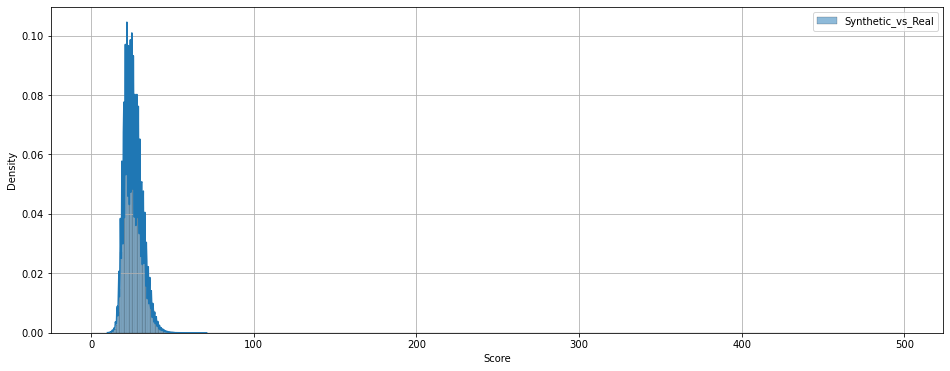

In [27]:
plt.figure(figsize=(16,6))
bins = np.arange(0,500)
sns.histplot(Comparisons.Score,label='Synthetic_vs_Real', bins=bins, stat='density', kde=True)
plt.legend()
plt.grid()